## Análisis - Premier League temporada 2015/2016 (masculina)

Vamos a hacer un análisis de las distintas competiciones (las cinco grandes ligas durante la temporada 2015-2016 y de todos los partidos en general) para poder entender que características son más importantes a la hora de tomar la decisión por parte del modelo de ML para decidir si el equipo va a ganar, perder o empatar el partido.

En este notebook en cuestión, vamos a analizar la Premier League en la temporada 2015/2016 (masculina).

Cargamos los datos de los partidos sobre la competición para entrenar el modelo y poder hacer el estudio de explicabilidad.

In [1]:
import os
import pandas as pd


competition_name = "Premier League"
competition_gender = "male"
season_name = "2015/2016"
season_name_for_filename = "2015_2016"

output_dir = "data/reduced/"
filename = f"{competition_name}({season_name_for_filename}_{competition_gender})_reduced.csv"
output_path = os.path.join(output_dir, filename)

if os.path.exists(output_path):
    print(f"Matches from the competition loaded from {output_path}")
    matches_in_PL = pd.read_csv(output_path)
else:
    print("You don't have data from the competition yet. Please run the notebook '0_datasets_building.ipynb' first.")

Matches from the competition loaded from data/reduced/Premier League(2015_2016_male)_reduced.csv


In [2]:
matches_in_PL.head(5)

,match_id,shots_on_target_ratio_home,shots_on_target_ratio_away,average_shots_on_target_distance_home,average_shots_on_target_distance_away,shots_inside_area_ratio_home,shots_inside_area_ratio_away,pass_success_ratio_home,pass_success_ratio_away,cross_success_ratio_home,...,percentage_shots_under_pressure_home,percentage_shots_inside_area_under_pressure_home,percentage_passes_under_pressure_home,percentage_passes_inside_area_under_pressure_home,percentage_set_piece_shots_home,percentage_set_piece_shots_inside_area_home,percentage_substitutions_home,percentage_tactical_substitutions_home,percentage_tactical_changes_home,percentage_formation_changes_home
0,3754097,0.111111,0.555556,15.620819,17.725682,0.555556,0.777778,0.808824,0.777778,0.200000,...,0.200000,0.000000,0.403846,0.285714,0.400000,0.200000,0.5,0.5,0.5,0.5
1,3754112,0.300000,0.285714,10.397006,13.959668,0.700000,0.714286,0.773852,0.772834,0.250000,...,0.250000,0.333333,0.569620,0.666667,0.533333,0.500000,0.6,0.5,0.5,0.5
2,3754141,0.260870,0.500000,15.724369,21.563397,0.695652,0.500000,0.834983,0.713158,0.320000,...,0.875000,0.875000,0.567797,0.750000,0.642857,0.666667,0.4,0.4,1.0,0.5
3,3754237,0.421053,0.555556,16.690552,10.904830,0.789474,0.666667,0.711392,0.753012,0.357143,...,0.625000,0.625000,0.365672,0.428571,0.647059,0.666667,0.6,0.6,0.5,0.5
4,3754300,0.454545,0.454545,18.363562,21.955396,0.636364,0.363636,0.785714,0.680912,0.260870,...,0.714286,0.800000,0.645833,0.600000,0.615385,0.666667,0.5,0.5,0.5,0.5


Una vez ya tenemos los datos cargados, entrenamos el mejor modelo (seleccionado tras la experimentación) y mostramos sus resultados.

In [3]:
from src.analysis import premierleague_best_model


best_model_PL, evaluation_metrics, X_train_reduced_PL, X_test_reduced_PL, X_test_reduced_orig_PL, feature_names_reduced_PL, encoder_PL, match_ids_test = premierleague_best_model(matches_in_PL)
print(f"The best model for La Liga is {best_model_PL}")
print(f"The evaluation metrics for the best model are:")
evaluation_metrics.head()

The best model for La Liga is LogisticRegression(C=0.6261372210153997, l1_ratio=0.5193180715867101,
                   max_iter=1000, penalty='elasticnet', random_state=42,
                   solver='saga')
The evaluation metrics for the best model are:


,Train Accuracy,Test Accuracy,Precision Macro,Precision Weighted,Recall Macro,Recall Weighted,F1 Macro,F1 Weighted
Logistic Regression MI,0.753289,0.697368,0.689362,0.693582,0.678779,0.697368,0.681101,0.692363


Una vez ya tenemos el mejor modelo entrenado comenzamos el análisis de explicabilidad.

### Estudio global

Vamos a comenzar por un estudio global. 

En este caso, al ser el mejor modelo Logistic Regression, vamos a fijarnos en el coeficiente (método coef_) que nos aporta el modelo para cada característica en cada clase. 
- Con esto, estamos observando la importancia global de cada característica para cada clase en términos de una relación lineal. Es decir, estamos observando relaciones exclusivamente lineales entre las características y la predicción.
- Con esto, no se tiene en cuenta las interacciones entre características ni tampoco explica predicciones individuales.

Los gráficos que se aparecen a continuación muestran la importancia de cada característica para predecir una determinada clase de resultado en los partidos de LaLiga. Las clases son:
- Clase "away_team": Indica qué características influyen en que el equipo visitante gane el partido.
- Clase "draw": Indica qué características influyen en que el partido termine en empate.
- Clase "home_team": Indica qué características influyen en que el equipo local gane el partido.

Los valores representados en el eje X son los coeficientes de la regresión logística, que indican la magnitud e impacto de cada variable en la probabilidad de un resultado específico. Valores positivos aumentan la probabilidad de que ocurra esa clase, mientras que valores negativos disminuyen dicha probabilidad.

Class 0: ['away_team']
Features with zero importance for class away_team:
['average_shots_on_target_distance_home', 'shots_inside_area_ratio_home', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'cross_success_ratio_home', 'dribbles_success_ratio_home', 'set_piece_shots_on_target_ratio_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'is_valid_win_last_home_match_home_team', 'is_valid_win_last_away_match_away_team', 'difference_passes_needed_to_make_a_shot_home', 'percentage_blocks_home', 'percentage_tackles_home', 'percentage_yellow_cards_home', 'percentage_dribbles_home', 'percentage_players_off_home', 'percentage_recoveries_attacking_third_home', 'percentage_set_piece_shots_home', 'percentage_tactical_substitutions_home']


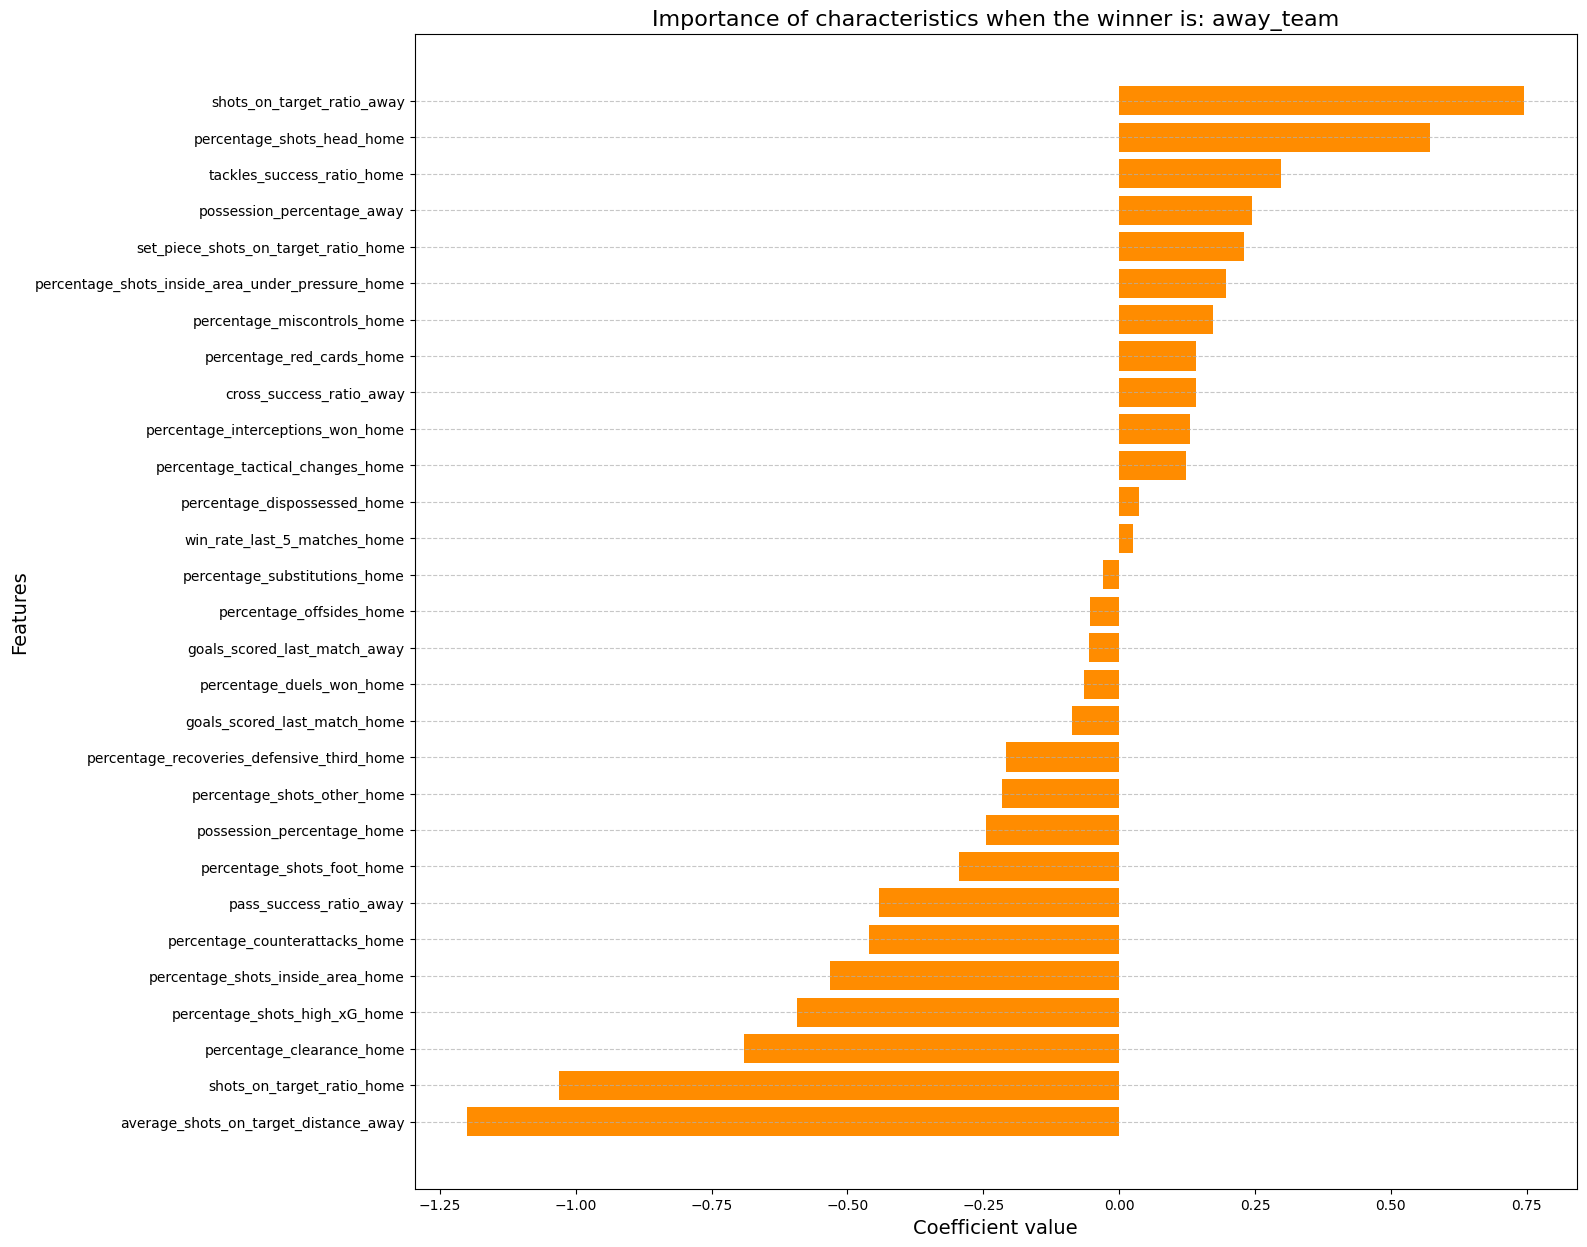

Class 1: ['draw']
Features with zero importance for class draw:
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_away', 'possession_percentage_home', 'possession_percentage_away', 'set_piece_shots_on_target_ratio_home', 'win_rate_last_5_matches_home', 'goals_scored_last_match_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'percentage_shots_other_home', 'percentage_clearance_home', 'percentage_miscontrols_home', 'percentage_red_cards_home', 'percentage_dribbles_home', 'percentage_players_off_home', 'percentage_dispossessed_home', 'percentage_counterattacks_home', 'percentage_recoveries_defensive_third_home', 'percentage_shots_inside_area_under_pressure_home', 'percentage_substitutions_home', 'percentage_tactical_changes_home']


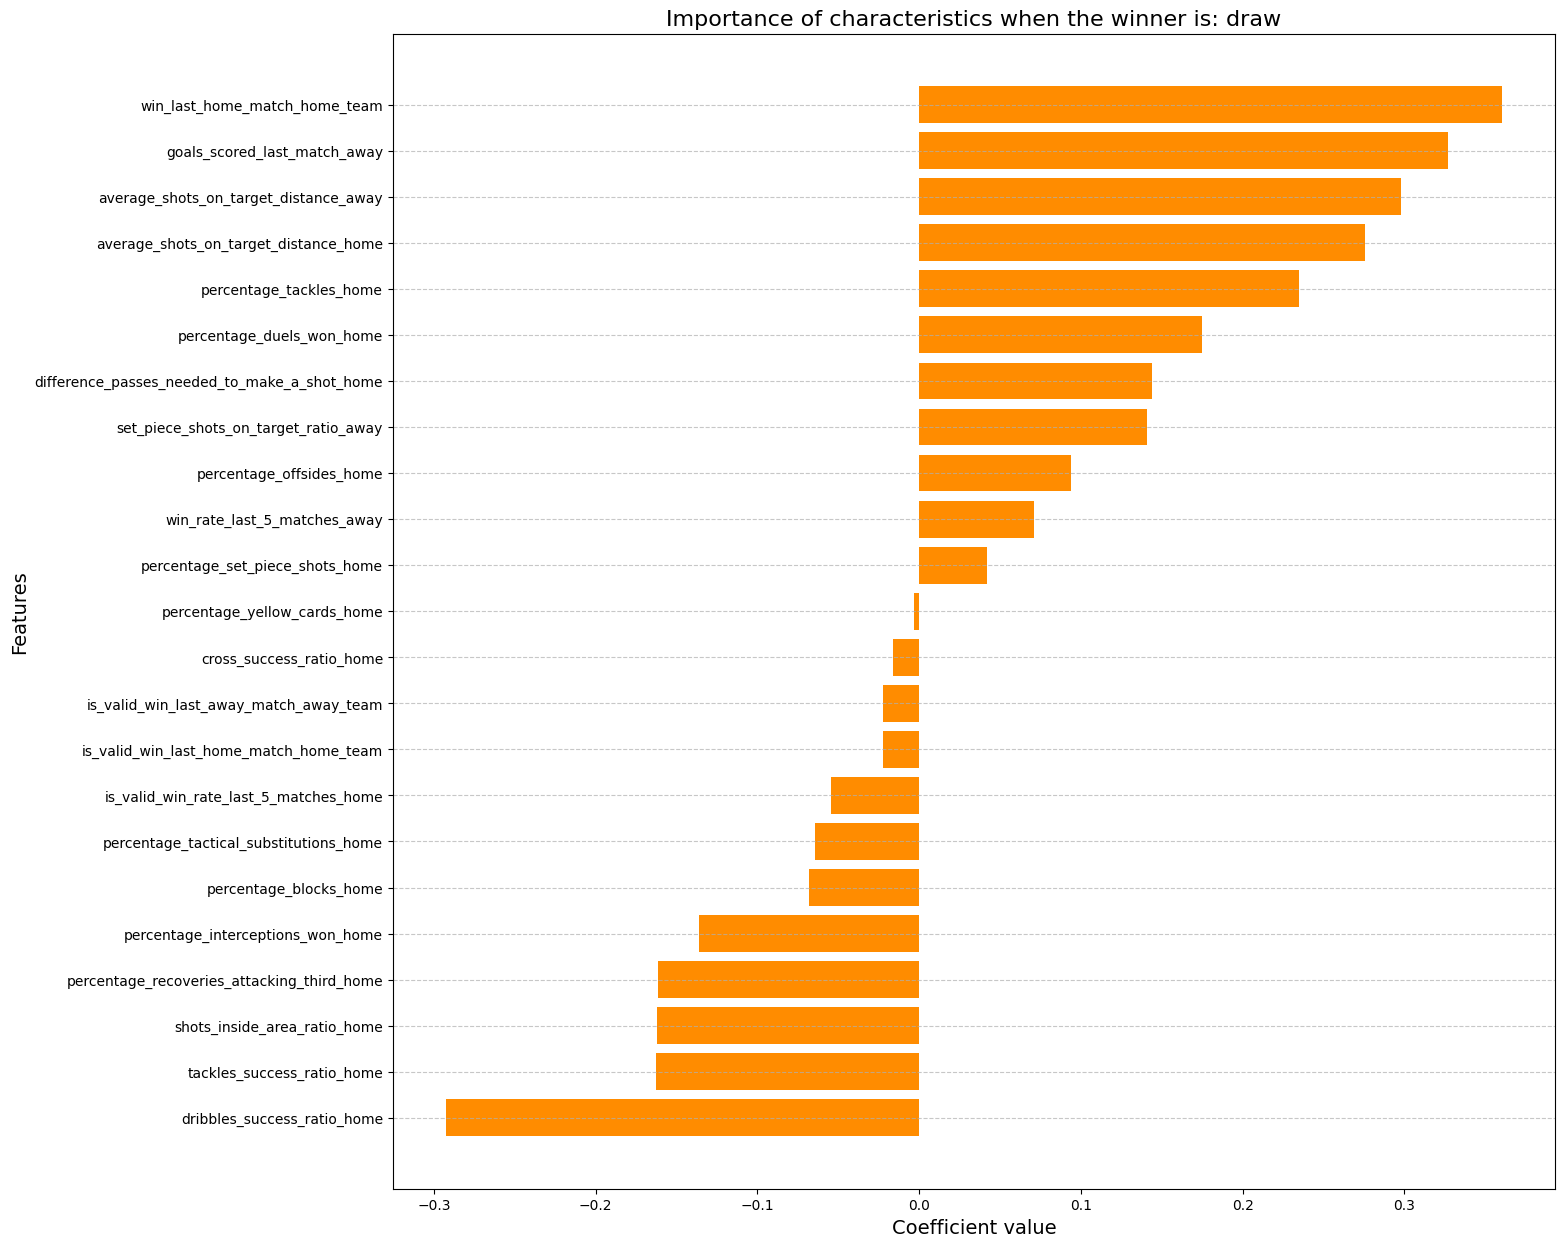

Class 2: ['home_team']
Features with zero importance for class home_team:
['average_shots_on_target_distance_away', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'cross_success_ratio_home', 'tackles_success_ratio_home', 'dribbles_success_ratio_home', 'win_rate_last_5_matches_home', 'is_valid_win_last_home_match_home_team', 'is_valid_win_last_away_match_away_team', 'goals_scored_last_match_away', 'percentage_interceptions_won_home', 'percentage_duels_won_home', 'percentage_offsides_home', 'percentage_players_off_home', 'percentage_recoveries_defensive_third_home']


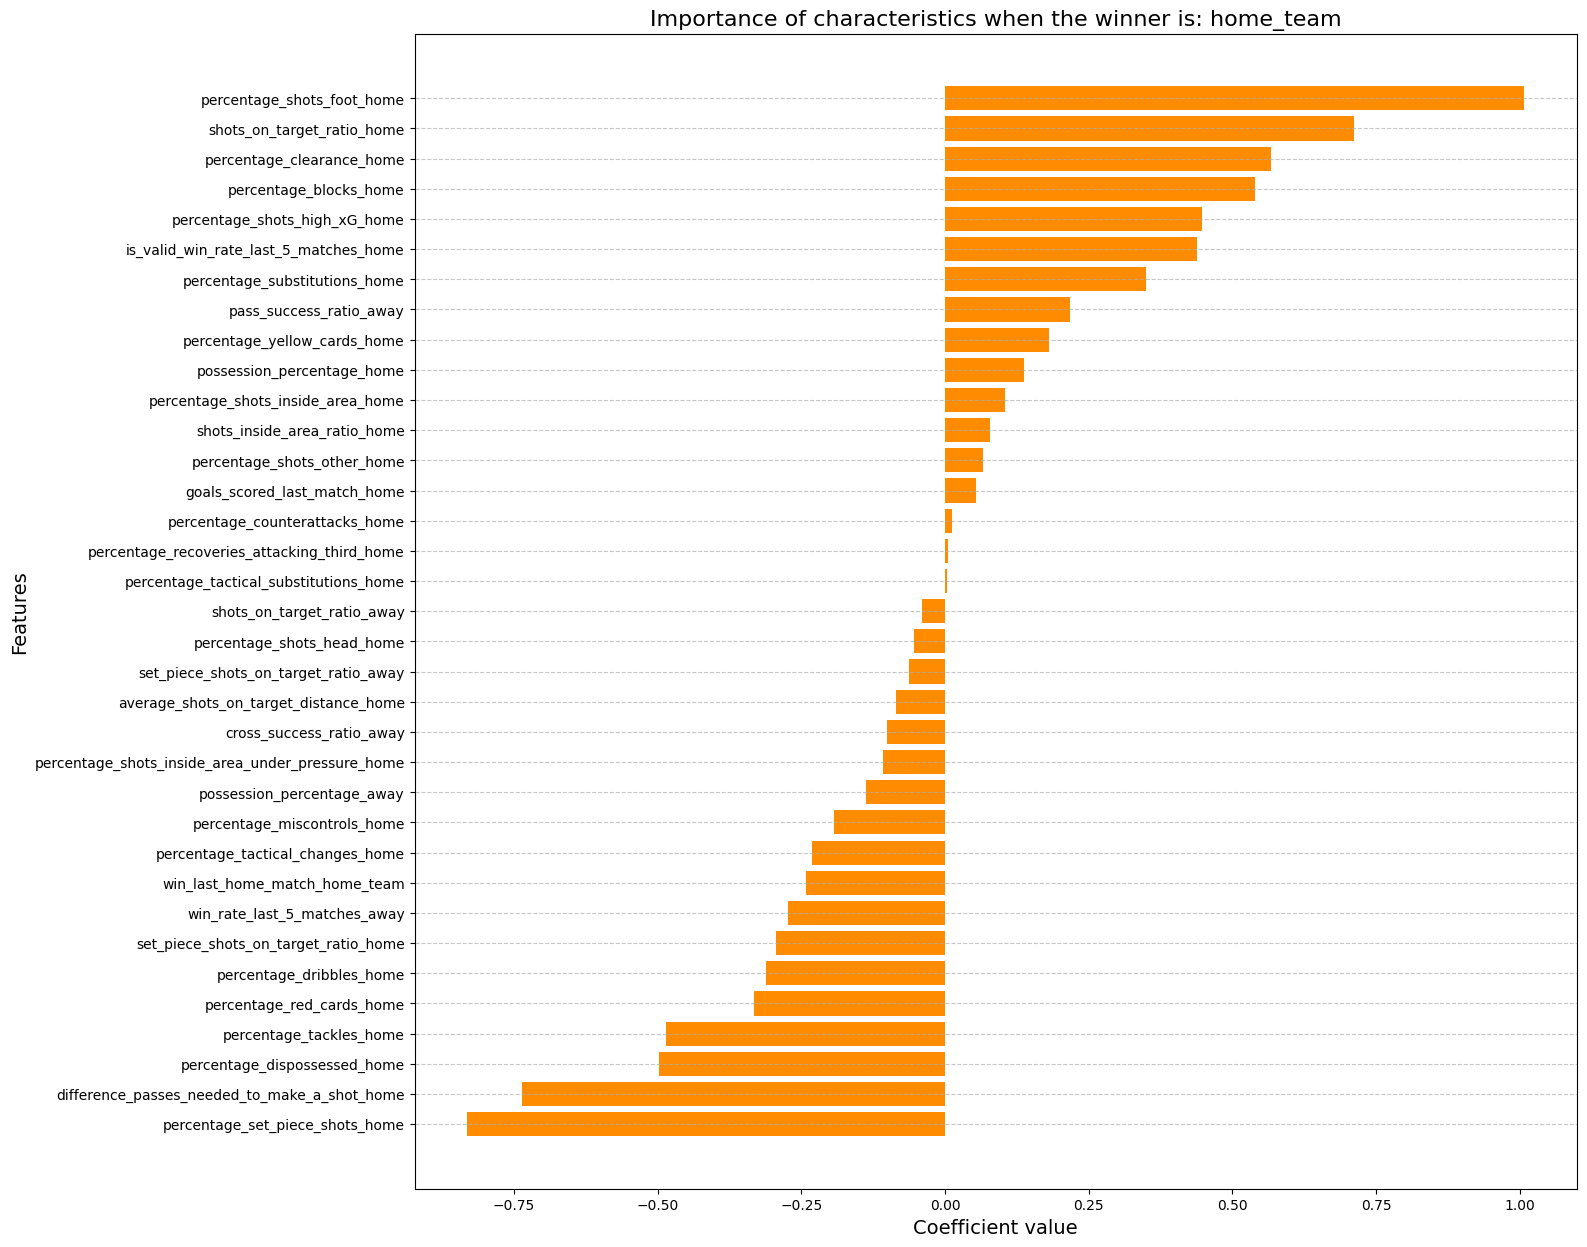

In [4]:
from src.analysis import logistic_regression_global_analysis

logistic_regression_global_analysis(best_model_PL, feature_names_reduced_PL, encoder_PL)